In [4]:
import numpy as np
import pandas as pd

In [ ]:
path = "data/ecommerce_data.csv"
df = pd.read_csv(path)

In [ ]:
def get_data():
    df = pd.read_csv('data/ecommerce_data.csv')
    data = df.as_matrix()
    
    X = data[:, :-1]
    Y = data[:, -1]
    
    # Normalize the numerical data
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
    
    N, D = X.shape
    
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)] #D-1 + D+3 th column will hot encoded cats
    
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1
        
#     Z = np.zeros((n, 4))
#     Z[np.arange(N), X[:D-1].astype(np.int32)] = 1
#     assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)
    
    return X2, Y

def get_binary_data():
    # Get the data and filter is for only the classes with 0 or 1
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

# Leaving this in a separate module

In [2]:
from process import get_binary_data
X, Y = get_binary_data()

In [25]:
X[0,:]

array([ 1.        , -0.81697841, -0.40827769,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ])

In [57]:
D = X.shape[1]
W = np.random.randn(D)
b = 0

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

P_Y_given_X = forward(X, W, b)
predictions = np.round(P_Y_given_X)

def classification_rate(Y, P):
    return np.mean(Y == P) # Will divide the number correct by the total num

print("Score:", classification_rate(Y, predictions))

Score: 0.304020100503


## checkpoint!
- The forward() function takes all of the feature values and weights, takes the dot product, adds a zero bias, and then evaluates the sigmoid function with this final scalar value. The weights and features can be + or -, and the sigmoid will return a value between 0 and 1
- This is an prediction! We can reference whether the true value was 0 or 1 to get accuracy.
- Each row is a new prediction
- Weights are randomly assigned initially and affect all predictions. We'll start updating these values soon!

# The cross-entropy error function

In [95]:
N = 100
D = 2
X = np.random.randn(N,D)

# Create two gaussian clouds centered at -2 and +2
X[:50, :] = X[:50,:] - 2*np.ones((50,D))
X[50:, :] = X[50:, :] + 2*np.ones((50,D))

T = np.array([0]*50 + [1]*50) # one cloud has a target of 0, the other is 1

ones = np.array([[1]*N]).T
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D+1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1+np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

print(cross_entropy(T,Y))

18.3289217197


In [96]:
# Use the closed form solution to logistic regression
w = np.array([0, 4, 4])

z = Xb.dot(w)
Y = sigmoid(z)

print(cross_entropy(T,Y))
# Error is indeed much lower!

0.0653223674319


### Visualizing the bayes solution that we just computed

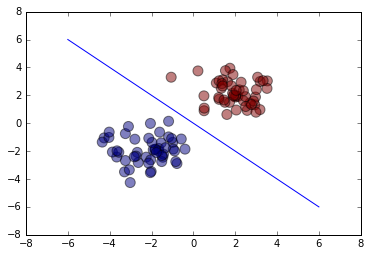

In [86]:
# y = -x
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5);
x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis);
plt.show();

### Applying gradient descent in code


In [204]:
# as above
N = 100
D = 2
X = np.random.randn(N,D)

# Create two gaussian clouds centered at -2 and +2
X[:50, :] = X[:50,:] - 2*np.ones((50,D))
X[50:, :] = X[50:, :] + 2*np.ones((50,D))

T = np.array([0]*50 + [1]*50) # one cloud has a target of 0, the other is 1

ones = np.array([[1]*N]).T
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D+1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1+np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

print(cross_entropy(T,Y))


# Closed form solution above provides a good baseline, 
# but using gradient descent works in general

# randomly initialize the weights
w = np.random.randn(D+1)

learning_rate = 0.1
for i in range(1000):
    if (i % 100 == 0):
        print(cross_entropy(T, Y))
        
    w += learning_rate * np.dot((T - Y).T, Xb)
    Y = sigmoid(Xb.dot(w))
    
print("Final w:", w)

533.095163721
533.095163721
0.00265349997825
0.00255839114562
0.00247006732221
0.00238783280148
0.00231108373917
0.00223929348342
0.00217200062804
0.00210879921725
0.00204933066295
Final w: [  0.12354785  20.99412545  21.50064963]


### applying learnings to our ecommerce example

In [196]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from process import get_binary_data

X, Y = get_binary_data()
X, Y = shuffle(X, Y)

Weight vector w: [-1.9426281   1.95537497  1.12900666 -2.19024683  0.8862252   0.32583903
 -1.11308046 -0.15946496]
0 0.858411882433 0.979631984533
Weight vector w: [  9.65670662e-01   5.71547775e+00   3.24087746e-01   1.05961749e+00
   4.16815383e-01  -6.40826441e-02  -4.32524077e-01  -5.59568270e-03]
1000 0.170682842862 0.235641463264
Weight vector w: [ 1.21392771  6.13677157  0.40452726  1.31520039  0.51180963 -0.08217598
 -0.5334623  -0.09322708]
2000 0.169323688203 0.234480906891
Weight vector w: [ 1.27953056  6.26460703  0.4287362   1.37939131  0.54110548 -0.08105572
 -0.56370891 -0.11735666]
3000 0.169217840824 0.234670842818
Weight vector w: [ 1.2998315   6.30562667  0.43653529  1.398848    0.5504008  -0.07997826
 -0.57347456 -0.12484323]
4000 0.169207369026 0.234779683639
Weight vector w: [ 1.30639266  6.31901453  0.439084    1.4050879   0.55341693 -0.07954951
 -0.57667034 -0.12726318]
5000 0.169206265989 0.234819993767
Weight vector w: [ 1.30854024  6.32340911  0.43992091  1.

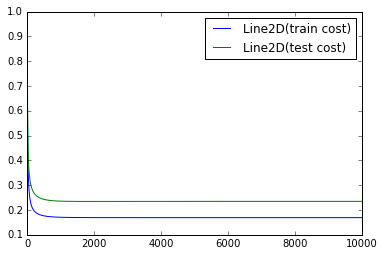

In [203]:
Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

D = X.shape[1]
W = np.random.randn(D)
b = 0

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

def classification_rate(Y, P):
    return np.mean(Y == P)

# new stuff
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1-T)*np.log(1-pY))

train_costs = []
test_costs = []
learning_rate = 0.001

for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    # now ready to do gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()
    
    if i % 1000 == 0:
        print (i, ctrain, ctest)
        
print("final train classification_rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("final test classification_rate:", classification_rate(Ytest, np.round(pYtest)))


legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()

### L2 Regularization

In [216]:
# Reusing some code from last time
N = 100
D = 2
X = np.random.randn(N,D)

# Create two gaussian clouds centered at -2 and +2
X[:50, :] = X[:50,:] - 2*np.ones((50,D))
X[50:, :] = X[50:, :] + 2*np.ones((50,D))

T = np.array([0]*50 + [1]*50) # one cloud has a target of 0, the other is 1

ones = np.array([[1]*N]).T
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D+1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1+np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

print(cross_entropy(T,Y))


# Closed form solution above provides a good baseline, 
# but using gradient descent works in general

# randomly initialize the weights
w = np.random.randn(D+1)

learning_rate = 0.1
for i in range(1000):
    if (i % 100 == 0):
        print(cross_entropy(T, Y))
        
    # The weights change proportionally to the magnitude of the 
    # derivative * learning rate
    # Adding L2 regularization!!
    w += learning_rate * (np.dot((T - Y).T, Xb) - 0.1*w)
    Y = sigmoid(Xb.dot(w))
    
print("Final w:", w)

524.0215135
524.0215135
0.0206545493002
0.18414188853
0.342283401035
0.344616422983
0.344599862692
0.344598177017
0.344598097172
0.344598093836
0.344598093701
Final w: [-0.72528865  2.46707912  2.03246579]


### L1 Regularization code 
- going to try and find a sparse set of weights that identify the useful dimensions of x


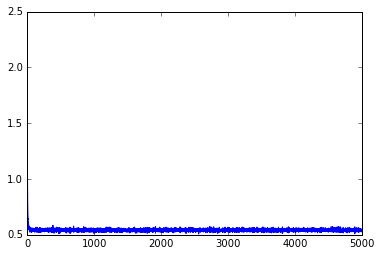

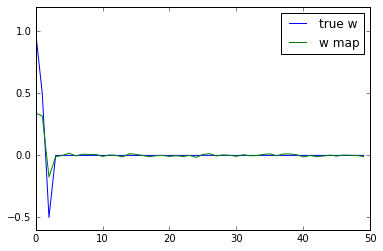

In [275]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

N = 50
D = 50 # fat matrix
X = (np.random.random((N,D)) - 0.5)*10 #between -5 and 5
true_w = np.array([1, 0.5, -0.5] + [0]*(D-3)) #last 47 dimensions don't effect output at all

Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5)) # + random noise

# now perform gradient descent
costs = []
w = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.001
l1 = 12.0 # try different values here

for t in range(5000):
    Yhat = sigmoid(X.dot(w))
    delta = Yhat - Y
    w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))
    
    cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1-Yhat)).mean() + l1*np.abs(w).mean()
    costs.append(cost)
    
plt.plot(costs)
plt.show()

plt.plot(true_w, label='true w')
plt.plot(w, label='w map')
plt.legend()
plt.show()